# AIR TICKET BOOKING SYSTEM WITH MONGODB
#-----------------------------------------------------------------------------------------------------------------
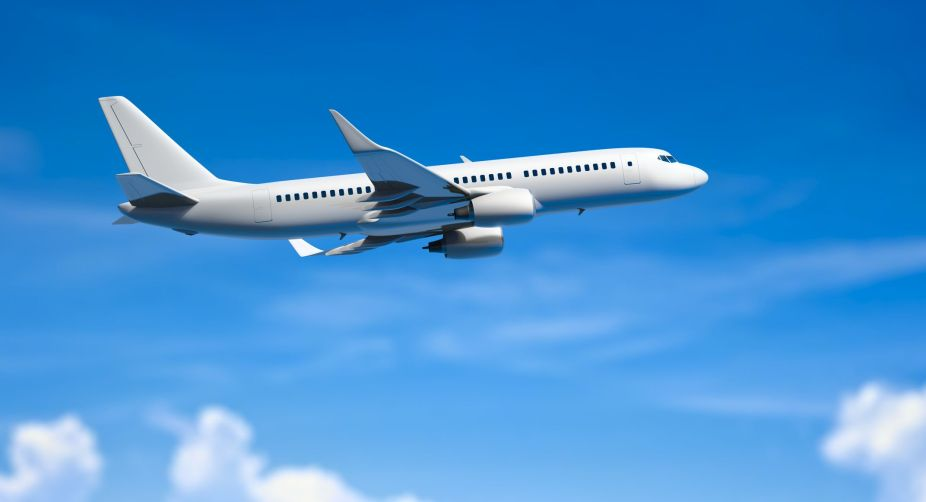

# **MANDATORY PACKAGES AND MODULES INSTALL**

In [ ]:
!pip install dnspython #IMPORTANT TO INSTALL
!pip install pymongo[srv] #IMPORTANT TO INSTALL
!pip install qrcode[pil] #FOR QR CODE
!pip install pillow #FOR QR CODE
import qrcode #FOR QR CODE
import cv2
from google.colab import files #FOR IMAGE OUTPUT
import matplotlib.pyplot as plt #FOR IMAGE OUTPUT
from termcolor import colored #for colouring import
from random import randint, randrange #FOR RANDOM OTP GENERATING

import pymongo #IMPORTANT FOR MONGODB

client = pymongo.MongoClient("")#PASTE YOUR MONGODB CONNECTION LINK

db = client.mobile_contact #CREATING DATABSE IN MONGODB
#CREATING COLLECTIONS IN MONGODB
records = db.plane1

records2 = db.air4
records3 = db.bookseats
records4 = db.air7




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **ADDING THE DETAILS OF FLIGHT(PRECAUTIONS FOR DETAILS ENTERING)**
#----------------------------------------------------------------------------------------------------------

* BEFORE MOVING TO LOGIN REGISTRATION PART, CREATING DETAILS IS MANDATORY!...
* HERE WE FIXING FLIGHT NAMES ARE "AX1" or "AX2" or "AX3" or "AX4" or "AX5" or "AX6"(TOTALLY 6 FLIGHTS WE FIXED)
* BETWEEN THE PLACES "PQ1" or "PQ2" or "PQ3" (THESE ARE THE ORIGINS AND DESTINATIONS)
* PUT DATE IN "DDMMYYYY" FORMAT, DON'T USE ANY OTHER FORMATS
* TIME IN "MM:SS" 24 HR FORMAT, DON'T USE OTHER FORMATS
* AFTER ALL THEY WILL CREATE A DICTIONARY IN MONGODB WITH EMPTY "[ ]" AS BOOKED AND LIST OF 20 INTEGERS AS UNRESERVED.
* YOU CAN MAKE ANY CHANGES IN THE CODE WITH YOUR WISH(THIS IS A SAMPLE BOOKING SYSTEM)

In [ ]:
def seats():
  flname = input("Enter flight name: ")
  if (flname == "AX1" or "AX2" or "AX3" or "AX4" or "AX5" or "AX6"):
    origin = input("Enter origin name: ")
    if (origin == "PQ1" or "PQ2" or "PQ3"):
      destination = input("Enter destination name: ")
      if (destination == "PQ1" or "PQ2" or "PQ3"):
        date = input("Enter the day: ")
        if ((len(date) == 8 and date.isdigit())):
          time1 = input("Enter takeoff time: ")
          if (len(time1)== 5):
            time2 = input("Enter landing time: ")
            if (len(time2)== 5):
              dict2={
                  "_id": flname,
                  "Origin": origin,
                  "Destination": destination,
                  "Date": date,
                  "Takeoff": time1,
                  "Landing": time2,
                  "BOOKED":[],
                  "UNRESERVED": [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20]
              }
              records.insert_one(dict2)

            else:
              print("Inlanding time")
          else:
            print("Intakeoff time")
        else:
          print("Indate")
      else:
        print("Indest")
    else:
      print("Inorig")
  else:
    print("Inflight")

seats()

# **ADDING FARE AMOUNT TO EACH FLIGHTS**
* ENTER FLIGHT NAME AS MENTIONED (ENTERERED) AS ABOVE.
* CLASS AMOUNTS AND TOTAL TIME ARE IN INTEGER (DON,T USE DECIMAL VALUES)
* THEY WILL CREATE A NEW DICTIONARY IN OTHER COLLECTION IN MONGODB.
* ADDING THESE DETAILS ARE MANDATORY!!!.

In [ ]:
def fare():
  x = input("ENTER FLIGHT NAME: ")
  y = int(input("ENTER CLASS A AMOUNT: "))
  z = int(input("ENTER CLASS B AMOUNT: "))
  w = int(input("ENTER TOTAL TIME IN MINUTS"))

  dict3 = {
      "_id": x,
      "CLASS_A": y,
      "CLASS_B": z,
      "Totaltime":w
  }
  records2.insert_one(dict3)
fare()

# Air Line Booking System

In [ ]:
print(''' \nWelcome to Airline Booking System \n
               pls enter login for Login
                register for Registration
                cancel for Cancel Ticket
                forget for forget password
                ''')
def begin():
  global option

option = input("Enter the option: ")
begin()

def access(option):
  if(option == "login"):
    return login()
  elif(option == "register"):
    return register()
  elif(option == "cancel"):
    return canceltick()
  elif(option == "forget"):
    return forgetpass()
  else:
    print("Try again or check selection correct")

def register():
  print('''\nPlease enter your details for registration ''')
  email = input("Enter your email id: ")
  if ("@" in email and "." in email):
    peru = input("Enter your name(Don't use space): ")
    if peru.isalpha():
      mobile = input("Enter your mobile number: ")
      if (len(mobile) == 10 and mobile.isdigit()):
        passw = input("Enter your password: ")
        if (passw.isdigit()):
          dict1 = {
              "_id":email,
              "name":peru,
              "phone":mobile,
              "password":passw,
              "Bookedetails": []
          }
          records2.insert_one(dict1)
          print("Registration Successfully...")

        else:
          print("Invalid Password")
          register()
      else:
        print("Invalid phone number")
        register()
    else:
      print("Invalid name")
      register()
  else:
    print("Invalid email id")
    register()

def login():
  print(''' \nWelcome to login Section
            ***************************''')
  email_1 = input("Please enter your registered email-id here...: ")
  password = input("Please enter your registered password here...: ")
  for x in records2.find({'_id':email_1},{'_id':1,'password':1}):

    if (x["_id"]==email_1) and (x["password"]==password):
      print("\nLogin Successfully...")
      return showflights(email_1)
    else:
      print("\nNot a registered User or Invalid password or id.")

def showflights(email_1):
  print('''\nPlease give origin and destination
  we will show you the flights and timings
  \n Origin and Destinations avilable: PQ1,PQ2 and PQ3
  '_id' is flight name
  date given in ddmmyyyy
  time in 24hrs format''')
  origin1 = input("Enter origin name: ")
  destination1 = input("Enter destination name: ")
  for y in records.find({"Origin": origin1,"Destination": destination1},{"_id": 1, "Date":1, "Takeoff":1, "Landing":1 }):
    print(y)
    return chooseflight(email_1)

def chooseflight(email_1):
  print('''\nPlease enter your flight name correctly''')
  flightname = input()
  seatindex = []
  for z in records.find({"_id":flightname},{"UNRESERVED": 1}):
    if z['UNRESERVED'] == []:
      print(colored('\033[1m' + '''   Sorry No seats avilable for this flight...
                             Thank You...For using  Airline Booking System
                        WE HOPE YOU ENJOY THE EXTENSION OF OUR SERVICE
                        Book for another flight''' + '\033[0m', 'red', attrs=['bold']))
    else:
      print("\nFrom total", len(z['UNRESERVED']),"avilable seats choose : ", sorted(z['UNRESERVED']))
      print(''' RESERVATION CLASSES
            **********************
            CLASS A - 1 to 10
            CLASS B - 11 to 20''')
      return bookseat(email_1, flightname)

def bookseat(email_1, flightname):
  print("\nEnter your choosen seat number")
  seatno =int(input())
  name = input("Enter your name for the seat(with no space): ")
  records.update_one({ "_id": flightname }, { "$pull": { "UNRESERVED": seatno}})
  records.update_one( { "_id": flightname }, { "$push": { "BOOKED": seatno } })
  records2.update_one({"_id":email_1},{"$push":{"Bookedetails":{"_id": name,"seatnumber": seatno}}})
  print('''  Enter * 1 for add one more passengers and
           * 2 for print ticket
           * Check ticket details are correct.
           *ADDING ONE PASSENGER AT A TIME''')
  addprint(email_1, flightname)


def add(email_1, flightname):

  for z in records.find({"_id":flightname},{"UNRESERVED": 1}):
    if(z['UNRESERVED']==[]):
      print(colored('\033[1m' + '''   Sorry No seats avilable for this flight...
                             Thank You...For using  Airline Booking System
                        WE HOPE YOU ENJOY THE EXTENSION OF OUR SERVICE
                        Book for another flight''' + '\033[0m', 'red', attrs=['bold']))
    else:
      print("\nFrom total", len(z['UNRESERVED']),"avilable seats choose : ", sorted(z['UNRESERVED']))
      print(''' RESERVATION CLASSES
            **********************
            CLASS A - 1 to 10
            CLASS B - 11 to 20''')
      name = input("Enter name with no spaces: ")
      seatno =int(input("Enter selected seat number: "))
      records.update_one({ "_id": flightname }, { "$pull": { "UNRESERVED": seatno}})
      records.update_one( { "_id": flightname }, { "$push": { "BOOKED": seatno } })
      records2.update_one({"_id":email_1},{"$push":{"Bookedetails":{"_id": name,"seatnumber": seatno}}})
      print('''  Enter * 1 for add one more passengers and
               * 2 for print ticket
               * Check ticket details are correct.
               *ADDING ONE PASSENGER AT A TIME''')
      addprint(email_1, flightname)

def printt(email_1, flightname):
  print(colored('\033[1m' + ''' ! Before going to print mention total number of seats booked carefully
                   example, if it is one enter 1 or two enter 2''' + '\033[0m', 'red', attrs=['bold']))
  g = int(input("Enter total number of seats booked now: "))
  b = []
  for y in records.find({'_id':flightname},{}):
    print("\n***")
    print("\n***")
    print("\n***")
    print(colored('\033[1m' + '''  AIR TICKET    ''' + '\033[0m', 'blue', attrs=['bold']))
    print("************************************************************")
    print("************************************************************")
  for x in records2.find({'_id':email_1},{'_id':0, 'Bookedetails':1}):
    print("BOOKED ID: ",email_1,"-------", "FLIGHT NAME: ",flightname,"---------","DATE: ",y['Date'])
    print("TAKEOFF TIME: ",y['Takeoff'],"--------","LANDING TIME: ",y['Landing'])
    print("ORIGIN: ",y['Origin'],"--------","DESTINATION: ",y['Destination'])
    print("Booking Details for ",flightname)
    print("\n***")
    for i in records4.find({'_id':flightname},{'_id':0, 'CLASS_A':1, 'CLASS_B':1, 'Totaltime':1}):
      for z in x['Bookedetails'][-g: ]:
        if z['seatnumber'] in [1,2,3,4,5,6,7,8,9,9,10]:
          fare = i['CLASS_A']
        elif z['seatnumber'] in [11,12,13,14,15,16,17,18,19,20]:
          fare = i['CLASS_B']
        b.append(fare)
        print("Name: ",z['_id'],"|.....|Seat No: ",z['seatnumber'], "....Fare: ", fare)


  print("Total Fare: ",sum(b))
  return payment(email_1, flightname)

def payment(email_1, flightname):

  print("PAYMENT SECTION")
  fare = int(input("Enter total amount correctly : "))
  #randint(100, 999)     # randint is inclusive at both ends
  otp = randrange(1000, 9999)  # randrange is exclusive at the stop
  print("This you OTP: ", otp)
  k = int(input("Enter your otp correctly: "))
  if (k == otp):
    print("We have received your payment Rs",fare)

    print(colored('\033[1m' + '''        Thank You...For using  Airline Booking System
                        WE HOPE YOU ENJOY THE EXTENSION OF OUR SERVICE''' + '\033[0m', 'red', attrs=['bold']))
    print("Enter 5 for generate QR and Exit")
    return addprint(email_1, flightname)
  else:
    print("Invalid OTP")


def Qrcodex(email_1, flightname):
  img = qrcode.make(email_1,box_size = 5, border = 1)
  type(img)
  img.save("sample.png")
  img1 = cv2.imread('/content/sample.png')
  plt.axis('off')
  plt.imshow(img1)

def canceltick():
  print(''' WELCOME TO AIR LINE CANCELLATION SYSTEM
        ************************************************
        *!Cancellation only done through your registered mail id and password!
        *!Then enter flight name and seat number correctly!
        *For this login you can cancel one ticket at a time
        *For one more ticket again you repeat the procedure
        *THIS IS DUE TO OUR SECURITY....''')
  email_1 = input("Please enter your registered email-id here...: ")
  password = input("Please enter your registered password here...: ")
  for x in records2.find({'_id':email_1},{'_id':1,'password':1}):
    if (x["_id"]==email_1) and (x["password"]==password):
      flightname = input("Enter your flight name correctly: ")
      seatno =int(input("Enter your Seat number correctly: "))
      records.update_one({ "_id": flightname }, { "$push": { "UNRESERVED": seatno}})
      records.update_one( { "_id": flightname }, { "$pull": { "BOOKED": seatno } })
      records2.update_one({"_id":email_1},{"$pull":{"Bookedetails":{"seatnumber": seatno}}})
      for i in records4.find({'_id':flightname},{'_id':0, 'CLASS_A':1, 'CLASS_B':1, 'Totaltime':1}):
        if seatno in [1,2,3,4,5,6,7,8,9,9,10]:
          print(" The refunded amount Rs", i['CLASS_A']*(0.75), " is the 75% of fare amount Rs", i['CLASS_A'],"will be transferred to your account...")
          print(''' THANK YOU FOR USING  AIRLINE BOOKING SYSTEM...
          ******************************************************************
          WE HOPE YOU ENJOY THE EXTENSION OF OUR SERVICE...
          *------------------------------------------------*
          *For one more cancellation Enter 4
          *For Exit enter 3 ''')
          return addprint(email_1, flightname)
        elif seatno in [11,12,13,14,15,16,17,18,19,20]:
          print(" The refunded amount Rs", i['CLASS_B']*(0.75), "is the 75% of fare amount Rs", i['CLASS_B'],"will be transferred to your account...")
          print(''' THANK YOU FOR USING  AIRLINE BOOKING SYSTEM...
          ******************************************************************
          WE HOPE YOU ENJOY THE EXTENSION OF OUR SERVICE...
          *------------------------------------------------*
          *For one more cancellation Enter 4
          *For Exit enter 3 ''')
          return addprint(email_1, flightname)
        else:
          print("SEAT NUMBER NOT MATCHED")

    else:
      print("Email or password incorrect")
def cancelplus(email_1, flightname):
   print(''' WELCOME TO AIR LINE CANCELLATION SYSTEM
        ************************************************
        *Enter enter flight name and seat number correctly!
        *For this login you can cancel one ticket at a time
        *For one more ticket again you repeat the procedure
        *THIS IS FOR YOUR OUR SECURITY....''')

   flightname = input("Enter your flight name correctly: ")
   seatno =int(input("Enter your Seat number correctly: "))
   records.update_one({ "_id": flightname }, { "$push": { "UNRESERVED": seatno}})
   records.update_one( { "_id": flightname }, { "$pull": { "BOOKED": seatno } })
   records2.update_one({"_id":email_1},{"$pull":{"Bookedetails":{"seatnumber": seatno}}})
   for i in records4.find({'_id':flightname},{'_id':0, 'CLASS_A':1, 'CLASS_B':1, 'Totaltime':1}):
      if seatno in [1,2,3,4,5,6,7,8,9,9,10]:
        print(" The refunded amount Rs", i['CLASS_A']*(0.75), " is the 75% of fare amount Rs", i['CLASS_A'],"will be transferred to your account...")
        print(''' THANK YOU FOR USING AIRLINE BOOKING SYSTEM...
          ******************************************************************
          WE HOPE YOU ENJOY THE EXTENSION OF OUR SERVICE...
          *------------------------------------------------*
          *For one more cancellation Enter 4
          *For Exit enter 3 ''')
        return addprint(email_1, flightname)
      elif seatno in [11,12,13,14,15,16,17,18,19,20]:
        print(" The refunded amount Rs", i['CLASS_B']*(0.75), "is the 75% of fare amount Rs", i['CLASS_B'],"will be transferred to your account...")
        print(''' THANK YOU FOR USING  AIRLINE BOOKING SYSTEM...
          ******************************************************************
          WE HOPE YOU ENJOY THE EXTENSION OF OUR SERVICE...
          *------------------------------------------------*
          *For one more cancellation Enter 4
          *For Exit enter 3 ''')
        return addprint(email_1, flightname)
      else:
        print("SEAT NUMBER NOT MATCHED")



def forgetpass():
  email_1 = input("Please enter your registered email-id here...: ")
  for x in records2.find({'_id':email_1},{'_id':1,'password':1}):
    print("Please check your system")
    print(x['password'],"is your password for the id",email_1)







def addprint(email_1, flightname):
  if __name__ == "__main__":
    try:
      while True:
        option = int(input("PLease Enter your Option: "))
        if option == 1:
          return add(email_1, flightname)
        elif option == 2:
          return printt(email_1, flightname)
        elif option == 3:
          return Exit(email_1, flightname)
        elif option == 4:
          return cancelplus(email_1, flightname)
        elif option == 5:
          return Qrcodex(email_1, flightname)
        else:
          print("Invalid Option")
    except:
      print("An exception occurred")

def Exit(email_1, flightname):
  print(colored('\033[1m' + '''        Thank You...For using  Airline Booking System
                        WE HOPE YOU ENJOY THE EXTENSION OF OUR SERVICE''' + '\033[0m', 'red', attrs=['bold']))



access(option)
begin()

